In [1]:
import Functions
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, sensitivity_contant, constant_trading, news_relevance, stock_favorability, period_length):
    # initialize price list for market
    price_list = [initial_price]
    price_fluctuation = Functions.price_fluctuations(period_length, price_list)
    price_fluctuation_list = [price_fluctuation]
    trades = Functions.trading_activity_function(constant_trading, price_fluctuation, stock_favorability)
    trades_list = [trades]
    
    # initialize transaction quantities. Note that this implies at t=0 we initialize with imitators not trading and fundamentalists changing to the updated price values
    transaction_quantities = Functions.next_state_Level_3(trader_grid, np.zeros((L,L)), price_list, fundamental_value, news_relevance, L, trades)
    transactions = [transaction_quantities]
    for t in range(time):
        price_fluctuation = Functions.price_fluctuations(period_length, price_list)
        price_fluctuation_list.append(price_fluctuation)
        trades = Functions.trading_activity_function(constant_trading, price_fluctuation, stock_favorability)
        trades_list.append(trades)
        
        transactions.append(Functions.next_state_Level_3(trader_grid, transactions[-1], price_list, fundamental_value, news_relevance, L, trades))
        trans_quantity = Functions.calculation_transaction_quantity(transactions[-1], L)
        price_list.append(Functions.price_function(price_list[-1],sensitivity_contant,L, trans_quantity))
    return np.array(transactions), np.array(price_list), np.array(price_fluctuation_list), np.array(trades_list)


In [3]:
def run_simulation_with_news_variation(L, fundamental_value, initial_price, time_steps, sensitivity_constant, constant_trading, c_fundamentalist, c_imitator, stock_favorability, period_length):
    # Initialize the trader grid
    trader_grid = Functions.grid_stock_market(L, fundamentalist_probability)

    # Run the simulation with varying news relevance
    _, price_list, _, _ = Level_3_simulation(
        trader_grid, initial_price, fundamental_value, time_steps, L, 
        sensitivity_constant, constant_trading, [c_fundamentalist, c_imitator], 
        stock_favorability, period_length
    )

    return np.mean(price_list), np.std(price_list)  # Return mean and standard deviation of prices


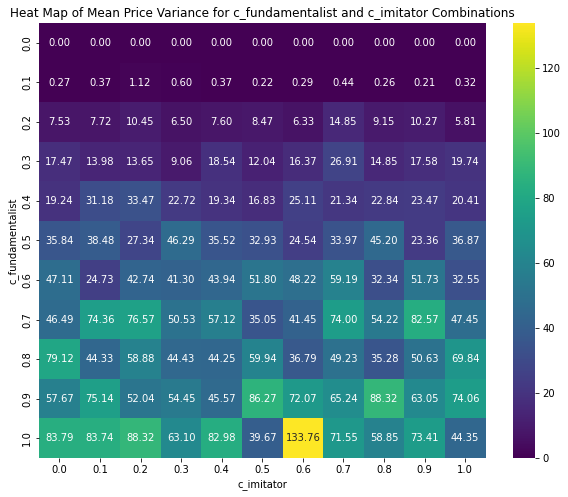

In [4]:

# Parameters for the simulation
L = 10
fundamental_value = 100
fundamentalist_probability = 0.5  # Probability of a trader being a fundamentalist
trader_grid = Functions.grid_stock_market(L, fundamentalist_probability)
initial_price = 100
time_steps = 100
sensitivity_constant = 0.8
constant_trading = 20
stock_favorability = 0.01
period_length = 10
num_runs = 5

# Ranges for c_fundamentalist and c_imitator
c_fundamentalist_range = np.arange(0, 1.1, 0.1)
c_imitator_range = np.arange(0, 1.1, 0.1)

# Initialize a matrix to store mean price variances
variance_matrix = np.zeros((len(c_fundamentalist_range), len(c_imitator_range)))

# Run simulations
for i, c_fundamentalist in enumerate(c_fundamentalist_range):
    for j, c_imitator in enumerate(c_imitator_range):
        variances_over_runs = []
        for _ in range(num_runs):
            _, std_price = run_simulation_with_news_variation(
                L, fundamental_value, initial_price, time_steps, sensitivity_constant, 
                constant_trading, c_fundamentalist, c_imitator, stock_favorability, period_length
            )
            variances_over_runs.append(std_price**2)  # Square of standard deviation to get variance
        mean_of_variances = np.mean(variances_over_runs)
        variance_matrix[i, j] = mean_of_variances

# Plotting the heat map for mean price variances
plt.figure(figsize=(10, 8))
sns.heatmap(variance_matrix, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=np.round(c_imitator_range, 2),
            yticklabels=np.round(c_fundamentalist_range, 2))
plt.xlabel('c_imitator')
plt.ylabel('c_fundamentalist')
plt.title('Heat Map of Mean Price Variance for c_fundamentalist and c_imitator Combinations')
plt.show()


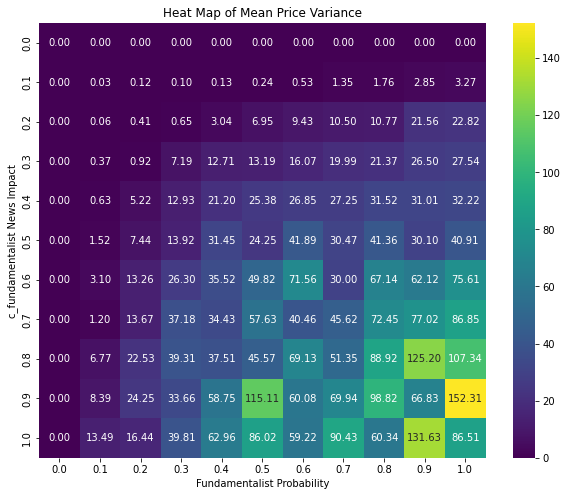

In [5]:
# Parameters for the simulation
L = 10
fundamental_value = 100
initial_price = 100
time_steps = 100
sensitivity_constant = 0.8
constant_trading = 20
stock_favorability = 0.01
period_length = 10
num_runs = 5

# Ranges for c_fundamentalist and fundamentalist_probability
c_fundamentalist_range = np.arange(0, 1.1, 0.1)
fundamentalist_probability_range = np.arange(0, 1.1, 0.1)

# Initialize a matrix to store mean price variances
variance_matrix = np.zeros((len(c_fundamentalist_range), len(fundamentalist_probability_range)))

# Run simulations
for i, c_fundamentalist in enumerate(c_fundamentalist_range):
    for j, fundamentalist_probability in enumerate(fundamentalist_probability_range):
        variances_over_runs = []
        for _ in range(num_runs):
            _, std_price = run_simulation_with_news_variation(
                L, fundamental_value, initial_price, time_steps, sensitivity_constant, 
                constant_trading, c_fundamentalist, 0.5, stock_favorability, period_length
            )
            variances_over_runs.append(std_price**2)
        mean_of_variances = np.mean(variances_over_runs)
        variance_matrix[i, j] = mean_of_variances

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(variance_matrix, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=np.round(fundamentalist_probability_range, 2),
            yticklabels=np.round(c_fundamentalist_range, 2))
plt.xlabel('Fundamentalist Probability')
plt.ylabel('c_fundamentalist News Impact')
plt.title('Heat Map of Mean Price Variance')
plt.show()